Check GPU

In [ ]:
!nvidia-smi

Fri May 27 21:32:54 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    24W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Load Google Drive 

In [ ]:
from google.colab import drive #Only if you are using Google Drive
drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)
%cd /content/gdrive/My\ Drive/

Location of spectograms for home location, small sample testing

In [ ]:
cd final/dataset2/

[Errno 2] No such file or directory: 'final/dataset2/'
/content/gdrive/My Drive/final/dataset2


In [ ]:
%tensorflow_version  1.x

TensorFlow 1.x selected.


**Model**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

training_dir = '/content/gdrive/MyDrive/final/dataset2/train/' 
validation_dir = '/content/gdrive/MyDrive/final/dataset2/validation/'
test_dir = '/content/gdrive/MyDrive/final/dataset2/test'

folders = glob(training_dir + '/*')
num_classes = len(folders)
print ('Total Classes = ' + str(num_classes))
print('Total training classes '+str(len(glob(training_dir + '/*'))))
print('Total test classes '+str(len(glob(test_dir + '/*'))))
print('Toral validation classes '+str(len(glob(validation_dir + '/*'))))

Total Classes = 177
Total training classes 177
Total test classes 177
Toral validation classes 177


Check folders

In [ ]:
import pandas as pd
import os
import shutil


dir1 = '/content/gdrive/MyDrive/final/dataset2/validation'
dir2 = '/content/gdrive/MyDrive/final/dataset2/train'
dir3 = '/content/gdrive/MyDrive/final/dataset2/test'
validations = os.listdir(dir1)
trains = os.listdir(dir2)
tests = os.listdir(dir3)
print(trains)
print(tests)
#if os.path.isdir(targetdir_chk) == False:
    # os.mkdir(targetdir_chk)
#    print(targetdir_chk + ' directory does not exist so it was created')

list_difference = []
for item in validations:
  if item not in trains:
    list_difference.append(item)

print('the following are missing directories:')
print(list_difference)

#create the missing directories in test
for item in list_difference:
    print(item)
    dir2create = '/Users/gracie/ML/AEA_dataset/freesound/spectograms/validation/'+item
    if os.path.isdir(item) == False:
        #os.mkdir(dir2create)
        print(dir2create + ' created')

######################
list_difference2 = []
for item in tests:
  if item not in validations:
    list_difference2.append(item)

print('the following are missing directories:')
print(list_difference2)

#create the missing directories in test
for item in list_difference2:
    print(item)
    dir2create = '/Users/gracie/ML/AEA_dataset/freesound/spectograms/validation/'+item
    if os.path.isdir(item) == False:
        #os.mkdir(dir2create)
        print(dir2create + ' created')

['Glass', 'Wind', 'Coin_dropping', 'Door', 'Writing', 'Bark', 'Water', 'Speech', 'Guitar', 'Fart', 'Boiling', 'Shatter', 'Female_speech_and_woman_speaking', 'Squeak', 'Wind_chime', 'Vehicle_horn_and_car_horn_and_honking', 'Alarm', 'Male_speech_and_man_speaking', 'Motor_vehicle_road', 'Electric_guitar', 'Truck', 'Tap', 'Gunshot_and_gunfire', 'Cutlery_and_silverware', 'Purr', 'Burping_and_eructation', 'Sneeze', 'Siren', 'Bass_guitar', 'Explosion', 'Keyboard_musical', 'Bird', 'Speech_synthesizer', 'Crying_and_sobbing', 'Drum', 'Engine', 'Meow', 'Tick', 'Knock', 'Ringtone', 'Frying_food', 'Wood', 'Applause', 'Wind_instrument_and_woodwind_instrument', 'Dishes_and_pots_and_pans', 'Human_group_actions', 'Screech', 'Fire', 'Walk_and_footsteps', 'Bell', 'Rattle', 'Train', 'Stream', 'Laughter', 'Mallet_percussion', 'Hi-hat', 'Packing_tape_and_duct_tape', 'Crash_cymbal', 'Bird_vocalization_and_bird_call_and_bird_song', 'Percussion', 'Skateboard', 'Mechanical_fan', 'Piano', 'Crowd', 'Mechanisms', 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

training_dir = '/content/gdrive/MyDrive/final/dataset2/train/' 
validation_dir = '/content/gdrive/MyDrive/final/dataset2/validation/'
test_dir = '/content/gdrive/MyDrive/final/dataset2/test'

folders = glob(training_dir + '/*')
num_classes = len(folders)
print ('Total Classes = ' + str(num_classes))

Total Classes = 177


Import Libraries

In [ ]:
# importing requried libraries
from keras import applications
from keras.models import Model
import keras 
from keras.applications.vgg16 import VGG16 #Importing the VGG16 Model
from keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D,BatchNormalization
from keras.applications import VGG16, MobileNetV2
from keras.optimizers import SGD
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input  

Using TensorFlow backend.


**StratifiedKFold**

In [ ]:
def train_model_naive_split():
  all_history = {}

  inp_train_gen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=260,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.2,
    zoom_range=0.4,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
  )

  train_data = pd.read_csv('/content/gdrive/MyDrive/final/mytrain.csv')
  train_data['label'] = train_data['label'].astype(str)
  Y = train_data[['label']]

  skf = StratifiedKFold(n_splits = 5, random_state = 7, shuffle = True) 

  fold = 1
  for train_index, val_index in skf.split(np.zeros(len(train_data)),Y):
    training_data = train_data.iloc[train_index]
    validation_data = train_data.iloc[val_index]

    train_iterator = inp_train_gen.flow_from_dataframe(training_data,
                                                        x_col='image_id',
                                                        y_col='label',
                                                        directory='/content/gdrive/MyDrive/final/dataset2/train',
                                                        target_size=IMG_SIZE,
                                                        batch_size=BATCH_SIZE,
                                                        class_mode='categorical',
                                                        shuffle=True)

    validation_iterator = inp_train_gen.flow_from_dataframe(validation_data,
                                                x_col='image_id',
                                                y_col='label',
                                                directory='/content/gdrive/MyDrive/final/dataset2/validation',
                                                target_size=IMG_SIZE,
                                                batch_size=BATCH_SIZE,
                                                class_mode='categorical',
                                                shuffle=True)

    model = create_cnn_model()

    model_name = f'/content/gdrive/MyDrive/final/best-model-kfold-{fold}.hdf5'
    history = model.fit(train_iterator,
                        validation_data=validation_iterator,
                        epochs=EPOCHS,
                        callbacks=create_callbacks(model_name))

    all_history[f'history-fold-{fold}'] = history

    fold += 1

  return all_history


**Data pre-processing**

In [ ]:
IMAGE_SIZE = [224,224]

training_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
training_generator = training_datagen.flow_from_directory(directory=training_dir,target_size = IMAGE_SIZE, batch_size = 255, class_mode = 'categorical')
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
validation_generator = validation_datagen.flow_from_directory(directory=validation_dir, target_size = IMAGE_SIZE, batch_size = 255, class_mode = 'categorical')
training_generator.class_indices


In [ ]:
IMAGE_SIZE = [224,224]

training_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=40, 
                                      width_shift_range=0.3, height_shift_range=0.3, 
                                      shear_range=0.3, horizontal_flip=True, fill_mode="nearest",
                                      preprocessing_function=preprocess_input,
                                      samplewise_center=True, samplewise_std_normalization=True)
training_generator = training_datagen.flow_from_directory(directory=training_dir,target_size = IMAGE_SIZE, batch_size = 255, class_mode = 'categorical')
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, samplewise_center=True, samplewise_std_normalization=True)
#validation_generator = validation_datagen.flow_from_directory(directory=validation_dir, target_size = IMAGE_SIZE, batch_size = 255, class_mode = 'categorical')
validation_generator = validation_datagen.flow_from_directory(directory=test_dir, target_size = IMAGE_SIZE, batch_size = 255, class_mode = 'categorical')
training_generator.class_indices


Found 34625 images belonging to 177 classes.
Found 4132 images belonging to 177 classes.


{'Accelerating_and_revving_and_vroom': 0,
 'Accordion': 1,
 'Acoustic_guitar': 2,
 'Alarm': 3,
 'Applause': 4,
 'Bark': 5,
 'Bass_drum': 6,
 'Bass_guitar': 7,
 'Bathtub_filling_or_washing': 8,
 'Bell': 9,
 'Bicycle_bell': 10,
 'Bird': 11,
 'Bird_vocalization_and_bird_call_and_bird_song': 12,
 'Boat_and_Water_vehicle': 13,
 'Boiling': 14,
 'Boom': 15,
 'Bowed_string_instrument': 16,
 'Brass_instrument': 17,
 'Burping_and_eructation': 18,
 'Bus': 19,
 'Buzz': 20,
 'Camera': 21,
 'Car': 22,
 'Car_passing_by': 23,
 'Cat': 24,
 'Chatter': 25,
 'Cheering': 26,
 'Chewing_and_mastication': 27,
 'Chicken_and_rooster': 28,
 'Child_speech_and_kid_speaking': 29,
 'Chime': 30,
 'Chink_and_clink': 31,
 'Chirp_and_tweet': 32,
 'Chuckle_and_chortle': 33,
 'Church_bell': 34,
 'Clapping': 35,
 'Clock': 36,
 'Coin_dropping': 37,
 'Computer_keyboard': 38,
 'Cough': 39,
 'Cowbell': 40,
 'Crack': 41,
 'Crackle': 42,
 'Crash_cymbal': 43,
 'Cricket': 44,
 'Crow': 45,
 'Crowd': 46,
 'Crumpling_and_crinkling': 

In [ ]:
import leave_data as ld
import leave_plot as lp
import leave_mixup as lm
import cosine_lr as clr

IMAGE_SIZE = [224,224]
BATCH_SIZE = 255
training_dir = '/content/gdrive/MyDrive/final/dataset2/train/' 
validation_dir = '/content/gdrive/MyDrive/final/dataset2/validation/'
test_dir = '/content/gdrive/MyDrive/final/dataset2/test'
train_iterator1 = ImageDataGenerator.flow_from_directory(directory=training_dir,
                                                   target_size=IMG_SIZE,
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   color_mode='rgb',
                                                   subset='training',
                                                   shuffle=True)

train_iterator2 = ImageDataGenerator.flow_from_directory(directory=training_dir,
                                                    target_size=IMG_SIZE,
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical',
                                                    color_mode='rgb',
                                                    subset='training',
                                                    shuffle=True)

train_iterator = lm.CutMixImageDataGenerator(generator1=train_iterator1,
                                             generator2=train_iterator2,
                                             img_size=IMG_SIZE[0],
                                             batch_size=BATCH_SIZE,
                                             )

validation_iterator = ImageDataGenerator.flow_from_directory(directory=validation_dir,
                                                        target_size=IMG_SIZE,
                                                        batch_size=BATCH_SIZE,
                                                        class_mode='categorical',
                                                        color_mode='rgb',
                                                        subset='validation',
                                                        shuffle=True)
log_dir = "/content/gdrive/MyDrive/final/logs/logs" + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')

ModuleNotFoundError: ignored

In [ ]:
import numpy as np
import random


class MixupImageDataGenerator():
    def __init__(self, generator, dataframe, x_col, y_col, directory, batch_size, img_height, img_width, alpha=0.2, subset=None):
        """Constructor for mixup image data generator.

        Arguments:
            generator {object} -- An instance of Keras ImageDataGenerator.
            directory {str} -- Image directory.
            batch_size {int} -- Batch size.
            img_height {int} -- Image height in pixels.
            img_width {int} -- Image width in pixels.

        Keyword Arguments:
            alpha {float} -- Mixup beta distribution alpha parameter. (default: {0.2})
            subset {str} -- 'training' or 'validation' if validation_split is specified in
            `generator` (ImageDataGenerator).(default: {None})
        """

        self.batch_index = 0
        self.batch_size = batch_size
        self.alpha = alpha

        # First iterator yielding tuples of (x, y)
        self.generator1 = generator.flow_from_dataframe(dataframe,
                                                        x_col=x_col,
                                                        y_col=y_col,
                                                        directory=directory,
                                                        target_size=(
                                                            img_height, img_width),
                                                        class_mode="categorical",
                                                        batch_size=batch_size,
                                                        shuffle=True,
                                                        subset=subset)

        # Second iterator yielding tuples of (x, y)
        self.generator2 = generator.flow_from_dataframe(dataframe,
                                                        x_col=x_col,
                                                        y_col=y_col,
                                                        directory=directory,
                                                        target_size=(
                                                            img_height, img_width),
                                                        class_mode="categorical",
                                                        batch_size=batch_size,
                                                        shuffle=True,
                                                        subset=subset)

        # Number of images across all classes in image directory.
        self.n = self.generator1.samples

    def reset_index(self):
        """Reset the generator indexes array.
        """

        self.generator1._set_index_array()
        self.generator2._set_index_array()

    def on_epoch_end(self):
        self.reset_index()

    def reset(self):
        self.batch_index = 0

    def __len__(self):
        # round up
        return (self.n + self.batch_size - 1) // self.batch_size

    def get_steps_per_epoch(self):
        """Get number of steps per epoch based on batch size and
        number of images.

        Returns:
            int -- steps per epoch.
        """

        return self.n // self.batch_size

    def __next__(self):
        """Get next batch input/output pair.

        Returns:
            tuple -- batch of input/output pair, (inputs, outputs).
        """

        if self.batch_index == 0:
            self.reset_index()

        current_index = (self.batch_index * self.batch_size) % self.n
        if self.n > current_index + self.batch_size:
            self.batch_index += 1
        else:
            self.batch_index = 0

        # random sample the lambda value from beta distribution.
        l = np.random.beta(self.alpha, self.alpha, self.batch_size)

        X_l = l.reshape(self.batch_size, 1, 1, 1)
        y_l = l.reshape(self.batch_size, 1)

        # Get a pair of inputs and outputs from two iterators.
        X1, y1 = self.generator1.next()
        X2, y2 = self.generator2.next()

        # Perform the mixup.
        X = X1 * X_l + X2 * (1 - X_l)
        y = y1 * y_l + y2 * (1 - y_l)
        return X, y

    def __iter__(self):
        while True:
            yield next(self)


class CutMixImageDataGenerator():
    def __init__(self, generator1, generator2, img_size, batch_size):
        self.batch_index = 0
        self.samples = generator1.samples
        self.class_indices = generator1.class_indices
        self.generator1 = generator1
        self.generator2 = generator2
        self.img_size = img_size
        self.batch_size = batch_size

    def reset_index(self):  # Ordering Reset (If Shuffle is True, Shuffle Again)
        self.generator1._set_index_array()
        self.generator2._set_index_array()

    def reset(self):
        self.batch_index = 0
        self.generator1.reset()
        self.generator2.reset()
        self.reset_index()

    def get_steps_per_epoch(self):
        quotient, remainder = divmod(self.samples, self.batch_size)
        return (quotient + 1) if remainder else quotient
    
    def __len__(self):
        self.get_steps_per_epoch()

    def __next__(self):
        if self.batch_index == 0: self.reset()

        crt_idx = self.batch_index * self.batch_size
        if self.samples > crt_idx + self.batch_size:
            self.batch_index += 1
        else:  # If current index over number of samples
            self.batch_index = 0

        reshape_size = self.batch_size
        last_step_start_idx = (self.get_steps_per_epoch()-1) * self.batch_size
        if crt_idx == last_step_start_idx:
            reshape_size = self.samples - last_step_start_idx
            
        X_1, y_1 = self.generator1.next()
        X_2, y_2 = self.generator2.next()
        
        cut_ratio = np.random.beta(a=1, b=1, size=reshape_size)
        cut_ratio = np.clip(cut_ratio, 0.2, 0.8)
        label_ratio = cut_ratio.reshape(reshape_size, 1)
        cut_img = X_2

        X = X_1
        for i in range(reshape_size):
            cut_size = int((self.img_size-1) * cut_ratio[i])
            y1 = random.randint(0, (self.img_size-1) - cut_size)
            x1 = random.randint(0, (self.img_size-1) - cut_size)
            y2 = y1 + cut_size
            x2 = x1 + cut_size
            cut_arr = cut_img[i][y1:y2, x1:x2]
            cutmix_img = X_1[i]
            cutmix_img[y1:y2, x1:x2] = cut_arr
            X[i] = cutmix_img
            
        y = y_1 * (1 - (label_ratio ** 2)) + y_2 * (label_ratio ** 2)
        return X, y

    def __iter__(self):
        while True:
            yield next(self)

ERROR: Could not find a version that satisfies the requirement leave_mixup (from versions: none)
ERROR: No matching distribution found for leave_mixup


Load VGG16

In [ ]:
vgg_model = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)  

for layer in vgg_model.layers:
      layer.trainable = False # Non trainable weights

# Create Dense Layers
# Add the last layers (Flatten and Dense layers) for our problem
x = Flatten()(vgg_model.output) 
x = Dense(num_classes, activation = 'softmax')(x)
x = Dropout(0.5)(x) # Dropout layer to reduce overfitting

transfer_model = Model(inputs = vgg_model.input, outputs = x)
# Compile model, for this we will be using ADAM optimiser to reach to the global minima while training our model
# learning_rate= 5e-5
transfer_model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
#history = transfer_model.fit(X_train, y_train, batch_size = 1, epochs=50, validation_data=(X_test,y_test))

#transfer_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
transfer_model.summary() #check summary of the model using this command


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
history = transfer_model.fit_generator(training_generator,
                   steps_per_epoch =136, #Number of iterations = number of training images (49,225) / batch size (255)  
                   epochs = 10, 
                   validation_data = validation_generator,
                   validation_steps = 2, #same for validation data 300 validation images
                   shuffle = True)
#                   callbacks=create_callbacks(log_dir)) 
transfer_model.save('/content/gdrive/MyDrive/final/AED_A_100_vgg16_full_193_Param.h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10


/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 59 could not be retrieved. It could be because a worker has died.
  UserWarning)


  3/136 [..............................] - ETA: 2:40:38 - loss: 10.1109 - accuracy: 0.0327

KeyboardInterrupt: ignored

In [ ]:
from keras.models import load_model
model = load_model('/content/gdrive/MyDrive/final/AED_A_100_vgg16_full_193_Param.h5')

Using TensorFlow backend.


AttributeError: ignored

In [ ]:
!pip install 'h5py==2.10.0' --force-reinstall

     |████████████████████████████████| 2.9 MB 5.4 MB/s 
     |████████████████████████████████| 15.7 MB 30.2 MB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lucid 0.3.10 requires umap-learn, which is not installed.
tensorflow 1.15.2 requires gast==0.2.2, but you have gast 0.5.3 which is incompatible.
lucid 0.3.10 requires numpy<=1.19, but you have numpy 1.21.6 which is incompatible.
kapre 0.3.7 requires tensorflow>=2.0.0, bu

Model Testing

In [ ]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.applications.vgg16 import preprocess_input
import numpy as np
import os
img_size = 224
dir_loc ='/content/gdrive/MyDrive/final/test'
clssN = os.listdir(dir_loc)

#clssN = ['Heidelberglaan15','Padualaan101','Padualaan97']
count = 0
countT = 0
for bl in clssN:
  src = './dataset/test/' + bl 
  imgs = os.listdir(src)
  count = 0
  countT = len(imgs) #total number of images per class
  for img in imgs: 
    im = load_img(src + "/" + img)
    w,h = im.size
    im = im.resize((int(w*0.2),int(h*0.2)))
    im = im.resize((img_size,img_size))
    x = img_to_array(im)  
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    x/=255.
    probs = transfer_model.predict(x, verbose=0)
    maxDet = max(probs[0])
    maxIdx = list(probs[0]).index(maxDet) #predicted class with maximum probability
    if (clssN[maxIdx]==bl): 
      count = count + 1  #count for true predictions (true positives)
    else:
      print(f'Wrong prediction of {bl}  {img}. Predicted as {clssN[maxIdx]}') 
  print(f'test accuracy for {bl} is {str(count/countT)}')

Using the below code, you will see the output of what building class the model has predicted for this specific image.

Plotting loss and accuracy

NameError: ignored

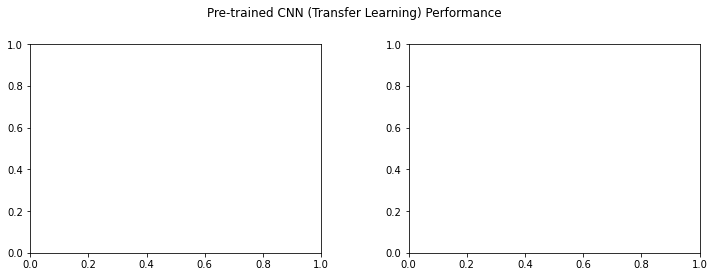

In [ ]:
#import matplotlib as plt
import matplotlib.pyplot as plt
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")